## Уравнение теплопроводности


Метод конечных разностей


In [171]:
import matplotlib.pyplot as plt
import numpy as np
class FDM():
    """
    This class solve the equation of conductivity
    
    """
    tmax = 600
    N = 100
    Tdistr = []
    t = []
    x = []
    def __init__(self, ro, lam, C, T0, T1, T2, L, tmax, N):
        self.ro = ro
        self.lam = lam
        self.C = C
        self.T0 = T0
        self.T1 = T1
        self.L = L
        self.T2 = T2
        self.tmax = tmax
        self.N = N
        self.Tdistr = []
        self.x = [0]

    def expsolve(self):
        dx = 0.01
        dt = 0.001
        N = int(self.L/dx)
        n = int(self.tmax/dt)
        T = np.zeros((N, n), dtype = np.float64)

        T[0][0] = self.T1
        T[N-1][0] = self.T2
        for i in range(1,N-1):
            T[i][0] = self.T0
        
        a = self.lam * dt / (self.ro * self.C * (dx**2))

        for j in range(1,n):
                T[0][j] = self.T1
                T[N-1][j] = self.T2
                for i in range(1,N-1):
                    T[i][j] = T[i][j-1] + a*(T[i+1][j-1] - 2*T[i][j-1] + T[i-1][j-1])
        x = np.linspace(0, self.L, N)
        Tres = [T[i][n-1] for i in range(N)]
        Tbeg = [T[i][0] for i in range(N)]
        Tmed = [T[i][int((n-1)/2)] for i in range(N)]
        plt.plot(x, Tres)
        plt.plot(x, Tbeg, color = 'r')
        plt.plot(x, Tmed, color = 'black')
 

In [172]:
b = FDM(7800, 46, 460, 300, 600, 400, 0.1, 200, 100)

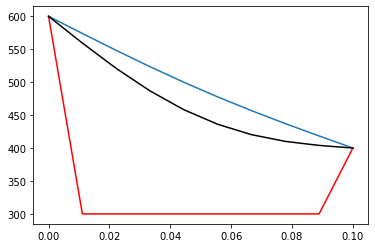

In [173]:
b.expsolve()